# Assignment 5

* Consider a scenario where a person visits a supermarket for shopping. S/He purchases various items in different sections such as clothing, grocery, utensils. Write an OpenMP program to process the bill parallelly in each section and display the final amount to be paid by the customer.
* Analyze the time take by sequential and parallel processing.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import threading
import time

In [10]:
class ProcessingThread(threading.Thread):
    def __init__(self, processing_function, num_items):
        super().__init__()
        self.processing_function = processing_function
        self.num_items = num_items
        self.results = []

    def run(self):
        for _ in range(self.num_items):
            result = self.processing_function()
            self.results.append(result)

In [11]:
def process_clothing():
    print("Processing clothing item...")
    time.sleep(0.1)
    return 50

In [12]:
def process_grocery():
    print("Processing grocery item...")
    time.sleep(0.1)
    return 50

In [13]:
def process_utensils():
    print("Processing utensils item...")
    time.sleep(0.1)
    return 20

Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing clothing item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing grocery item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Processing utensils item...
Total amount to be paid (Sequential): $1200.00
Time taken (Sequential): 3.03 seconds

Processing clothing item...
Processing grocery item...
Processing utensils item...
P

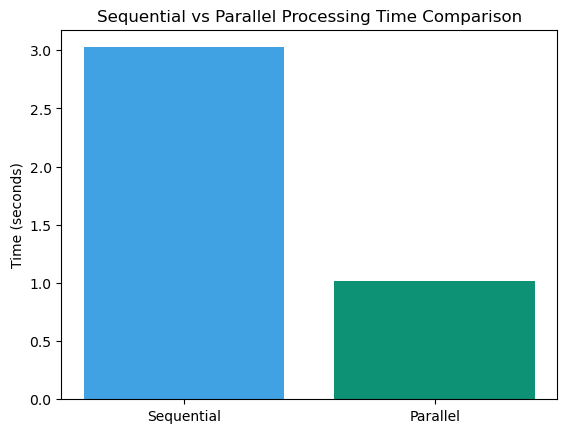

In [15]:
if __name__ == "__main__":
    # For Sequential Processing
    start_time = time.time()

    clothing_cost = sum(process_clothing() for _ in range(10))
    grocery_cost = sum(process_grocery() for _ in range(10))
    utensils_cost = sum(process_utensils() for _ in range(10))

    total_cost = clothing_cost + grocery_cost + utensils_cost
    sequential_time = time.time() - start_time
    print(f"Total amount to be paid (Sequential): ${total_cost:.2f}")
    print(f"Time taken (Sequential): {sequential_time:.2f} seconds\n")

    # For Parallel Processing
    start_time = time.time()

    # Create threads for parallel processing
    num_items = 10
    threads = [
        ProcessingThread(process_clothing, num_items),
        ProcessingThread(process_grocery, num_items),
        ProcessingThread(process_utensils, num_items)
    ]

    for thread in threads:
        thread.start()

    for thread in threads:
        thread.join()

    total_cost_parallel = sum(sum(thread.results) for thread in threads)
    parallel_time = time.time() - start_time
    print(f"Total amount to be paid (Parallel): ${total_cost_parallel:.2f}")
    print(f"Time taken (Parallel): {parallel_time:.2f} seconds")

    labels = ['Sequential', 'Parallel']
    times = [sequential_time, parallel_time]

    plt.bar(labels, times, color=['#40A2E3', '#0D9276'])
    plt.ylabel('Time (seconds)')
    plt.title('Sequential vs Parallel Processing Time Comparison')
    plt.show()